# Learning the Fashion MNIST dataset

## Creating a baseline for fully connected layer NNs

In [23]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(nontest_images, nontest_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 2.9737 - accuracy: 0.6904 - val_loss: 0.7961 - val_accuracy: 0.7174
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6505 - accuracy: 0.7672 - val_loss: 0.5954 - val_accuracy: 0.7848
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5693 - accuracy: 0.8043 - val_loss: 0.6183 - val_accuracy: 0.7921
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5259 - accuracy: 0.8185 - val_loss: 0.5331 - val_accuracy: 0.8199
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5093 - accuracy: 0.8288 - val_loss: 0.5153 - val_accuracy: 0.8145
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4980 - accuracy: 0.8317 - val_loss: 0.5575 - val_accuracy: 0.8106
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4933 - accuracy: 0.8329 - val_loss: 0.5862 - val_accuracy

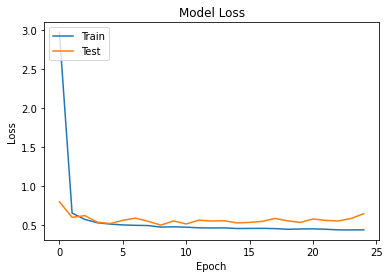

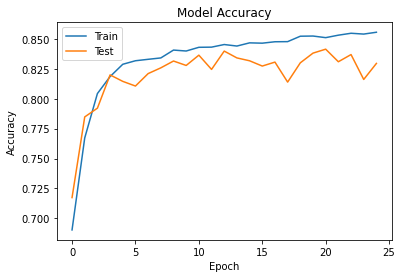

313/313 [==============================] - 1s 3ms/step - loss: 0.6434 - accuracy: 0.8295
Baseline accuracy: 0.8295000195503235


In [25]:
# baseline model: no normalization, 1 hidden layer with 128 nodes, default learning rate,
# etc.
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28))) # flatten the input
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(nontest_images, nontest_labels, epochs=25, validation_data=(test_images, test_labels))

# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# print the final test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Baseline accuracy:', test_acc)

## Beating the baseline.

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5203 - accuracy: 0.8183 - val_loss: 0.4517 - val_accuracy: 0.8380
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3914 - accuracy: 0.8596 - val_loss: 0.3805 - val_accuracy: 0.8633
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3489 - accuracy: 0.8738 - val_loss: 0.3337 - val_accuracy: 0.8796
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3222 - accuracy: 0.8814 - val_loss: 0.3275 - val_accuracy: 0.8795
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.3307 - accuracy: 0.8801
Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5209 - accuracy: 0.8156 - val_loss: 0.4085 - val_accuracy: 0.8543
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3891 - accuracy: 0.8606 - val_loss: 0.4457 - val_accuracy: 0.8407
Epoch 3/5
1500/1500 [======================

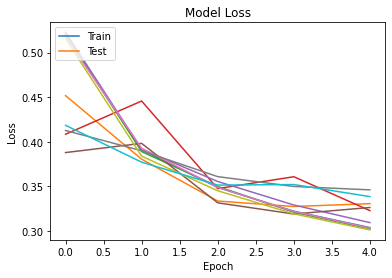

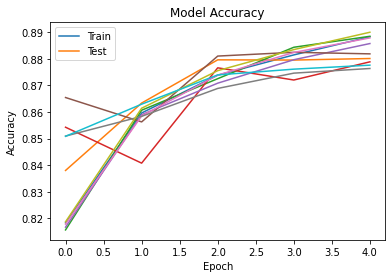

Average validation accuracy: 0.878933334350586


In [33]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(nontest_images, nontest_labels), (test_images, test_labels) = fashion_mnist.load_data()

def init_model():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # flatten the input
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# normalization
nontest_images = nontest_images / 255.0
test_images = test_images / 255.0

# k-fold cross validation
# shuffle data
indices = np.random.permutation(nontest_images.shape[0])
nontest_images = nontest_images[indices]
nontest_labels = nontest_labels[indices]

# use sklearn to do 5-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# store the accuracies
accuracies = []
histories = []

for train_index, val_index in kf.split(nontest_images):
    model = init_model()
    history = model.fit(nontest_images[train_index], nontest_labels[train_index], epochs=5, validation_data=(nontest_images[val_index], nontest_labels[val_index]))
    val_loss, val_acc = model.evaluate(nontest_images[val_index], nontest_labels[val_index])
    accuracies.append(val_acc)
    histories.append(history)

# plot the training and validation loss
for history in histories:
    plt.plot(history.history['loss'], color = 'blue')
    plt.plot(history.history['val_loss'], color = 'orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the training and validation accuracy
for history in histories:
    plt.plot(history.history['accuracy'], color = 'blue')
    plt.plot(history.history['val_accuracy'], color = 'orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# print the final average validation accuracy
print('Average validation accuracy:', np.mean(accuracies))

- add another hidden layer
- use RMSProp (special case of adam)

Epoch 1/5
1500/1500 [==============================] - 341s 227ms/step - loss: 0.5100 - accuracy: 0.8169 - val_loss: 0.4299 - val_accuracy: 0.8456
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3811 - accuracy: 0.8613 - val_loss: 0.3794 - val_accuracy: 0.8691
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3527 - accuracy: 0.8734 - val_loss: 0.3622 - val_accuracy: 0.8731
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3359 - accuracy: 0.8798 - val_loss: 0.3818 - val_accuracy: 0.8741
Epoch 5/5
375/375 [==============================] - 2s 4ms/step - loss: 0.4248 - accuracy: 0.8686
Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5097 - accuracy: 0.8143 - val_loss: 0.4454 - val_accuracy: 0.8352
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3810 - accuracy: 0.8622 - val_loss: 0.3812 - val_accuracy: 0.8677
Epoch 3/5
1500/1500 [==============

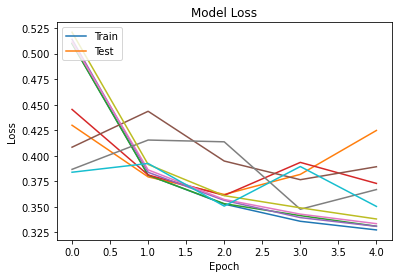

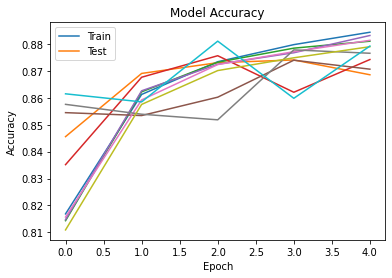

Average validation accuracy: 0.8738666653633118


In [34]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(nontest_images, nontest_labels), (test_images, test_labels) = fashion_mnist.load_data()

def init_model():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # flatten the input
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# normalization
nontest_images = nontest_images / 255.0
test_images = test_images / 255.0

# k-fold cross validation
# shuffle data
indices = np.random.permutation(nontest_images.shape[0])
nontest_images = nontest_images[indices]
nontest_labels = nontest_labels[indices]

# use sklearn to do 5-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# store the accuracies
accuracies = []
histories = []

for train_index, val_index in kf.split(nontest_images):
    model = init_model()
    history = model.fit(nontest_images[train_index], nontest_labels[train_index], epochs=5, validation_data=(nontest_images[val_index], nontest_labels[val_index]))
    val_loss, val_acc = model.evaluate(nontest_images[val_index], nontest_labels[val_index])
    accuracies.append(val_acc)
    histories.append(history)

# plot the training and validation loss
for history in histories:
    plt.plot(history.history['loss'], color='blue')
    plt.plot(history.history['val_loss'], color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the training and validation accuracy
for history in histories:
    plt.plot(history.history['accuracy'], color='blue')
    plt.plot(history.history['val_accuracy'], color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# print the final average validation accuracy
print('Average validation accuracy:', np.mean(accuracies))

That didn't help...

- Add dropout
- increase epochs

Epoch 1/10
1500/1500 [==============================] - 15s 8ms/step - loss: 0.5448 - accuracy: 0.8063 - val_loss: 0.4062 - val_accuracy: 0.8553
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4051 - accuracy: 0.8554 - val_loss: 0.3722 - val_accuracy: 0.8703
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3696 - accuracy: 0.8676 - val_loss: 0.3653 - val_accuracy: 0.8658
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3454 - accuracy: 0.8735 - val_loss: 0.3662 - val_accuracy: 0.8702
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3291 - accuracy: 0.8786 - val_loss: 0.3369 - val_accuracy: 0.8771
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3144 - accuracy: 0.8838 - val_loss: 0.3296 - val_accuracy: 0.8807
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3054 - accuracy: 0.8878 - val_loss: 0.3237 - val_ac

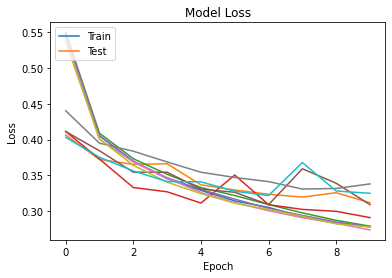

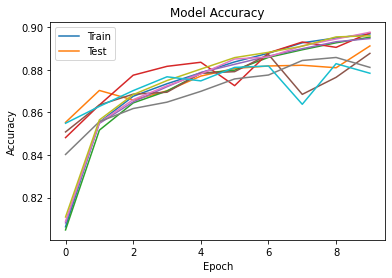

Average validation accuracy: 0.8871999979019165


In [35]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(nontest_images, nontest_labels), (test_images, test_labels) = fashion_mnist.load_data()

def init_model():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # flatten the input
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.15))  # Adding dropout for regularization
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# normalization
nontest_images = nontest_images / 255.0
test_images = test_images / 255.0

# k-fold cross validation
# shuffle data
indices = np.random.permutation(nontest_images.shape[0])
nontest_images = nontest_images[indices]
nontest_labels = nontest_labels[indices]

# use sklearn to do 5-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# store the accuracies
accuracies = []
histories = []

for train_index, val_index in kf.split(nontest_images):
    model = init_model()
    history = model.fit(nontest_images[train_index], nontest_labels[train_index], epochs=10, validation_data=(nontest_images[val_index], nontest_labels[val_index]))
    val_loss, val_acc = model.evaluate(nontest_images[val_index], nontest_labels[val_index])
    accuracies.append(val_acc)
    histories.append(history)

# plot the training and validation loss
for history in histories:
    plt.plot(history.history['loss'], color = 'blue')
    plt.plot(history.history['val_loss'], color = 'orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the training and validation accuracy
for history in histories:
    plt.plot(history.history['accuracy'], color = 'blue')
    plt.plot(history.history['val_accuracy'], color = 'orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# print the final average validation accuracy
print('Average validation accuracy:', np.mean(accuracies))

I think we've afforded ourselves more complexity
- add Leaky ReLU layer before relu layer
- increse epochs to 15, but

Epoch 1/15
1500/1500 [==============================] - 16s 9ms/step - loss: 0.5391 - accuracy: 0.8062 - val_loss: 0.4175 - val_accuracy: 0.8486
Epoch 2/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4061 - accuracy: 0.8515 - val_loss: 0.4159 - val_accuracy: 0.8500
Epoch 3/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3722 - accuracy: 0.8617 - val_loss: 0.3735 - val_accuracy: 0.8692
Epoch 4/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3510 - accuracy: 0.8707 - val_loss: 0.3375 - val_accuracy: 0.8781
Epoch 5/15
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3384 - accuracy: 0.8738 - val_loss: 0.3509 - val_accuracy: 0.8741
Epoch 6/15
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3250 - accuracy: 0.8799 - val_loss: 0.3292 - val_accuracy: 0.8831
Epoch 7/15
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3145 - accuracy: 0.8832 - val_loss: 0.3288 - val_ac

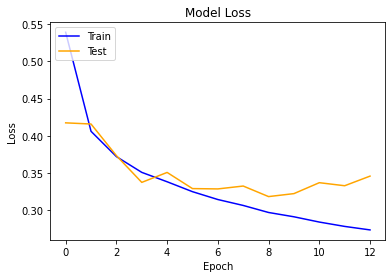

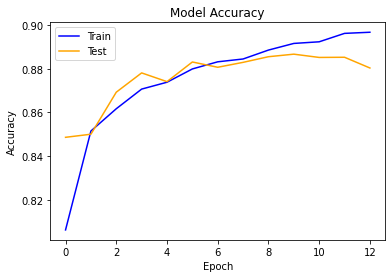

Average validation accuracy: 0.8866666555404663


In [39]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(nontest_images, nontest_labels), (test_images, test_labels) = fashion_mnist.load_data()

def init_model():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # flatten the input
    # leaky relu activation function
    model.add(layers.Dense(128, activation= tf.nn.leaky_relu))
    model.add(layers.Dropout(0.15))  # Adding dropout for regularization
    model.add(layers.Dense(128, 'relu'))
    model.add(layers.Dropout(0.1))  # Adding dropout for regularization
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

from tensorflow.keras.callbacks import EarlyStopping
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',  # Monitor validation accuracy
                               patience=3,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore the weights from the epoch with the best value of the monitored metric

# normalization
nontest_images = nontest_images / 255.0
test_images = test_images / 255.0

# k-fold cross validation
# shuffle data
indices = np.random.permutation(nontest_images.shape[0])
nontest_images = nontest_images[indices]
nontest_labels = nontest_labels[indices]

# use sklearn to do 5-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# store the accuracies
accuracies = []
histories = []

for train_index, val_index in kf.split(nontest_images):
    model = init_model()
    history = model.fit(nontest_images[train_index], nontest_labels[train_index], epochs=15, validation_data=(nontest_images[val_index], nontest_labels[val_index]), callbacks=[early_stopping])
    val_loss, val_acc = model.evaluate(nontest_images[val_index], nontest_labels[val_index])
    accuracies.append(val_acc)
    histories.append(history)
    break

# plot the training and validation loss
for history in histories:
    plt.plot(history.history['loss'], color = 'blue')
    plt.plot(history.history['val_loss'], color = 'orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the training and validation accuracy
for history in histories:
    plt.plot(history.history['accuracy'], color = 'blue')
    plt.plot(history.history['val_accuracy'], color = 'orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# print the final average validation accuracy
print('Average validation accuracy:', np.mean(accuracies))

- Extra complexity didn't help really. That's kind of nice to know. Let's reduce dropout.
- Keep leaky relu?

Epoch 1/15
1500/1500 [==============================] - 15s 8ms/step - loss: 0.5490 - accuracy: 0.8062 - val_loss: 0.4188 - val_accuracy: 0.8492
Epoch 2/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4203 - accuracy: 0.8484 - val_loss: 0.3869 - val_accuracy: 0.8633
Epoch 3/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3864 - accuracy: 0.8596 - val_loss: 0.3900 - val_accuracy: 0.8600
Epoch 4/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3677 - accuracy: 0.8672 - val_loss: 0.3636 - val_accuracy: 0.8715
Epoch 5/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3522 - accuracy: 0.8705 - val_loss: 0.3504 - val_accuracy: 0.8777
Epoch 6/15
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3395 - accuracy: 0.8747 - val_loss: 0.3363 - val_accuracy: 0.8798
Epoch 7/15
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3298 - accuracy: 0.8778 - val_loss: 0.3736 - val_ac

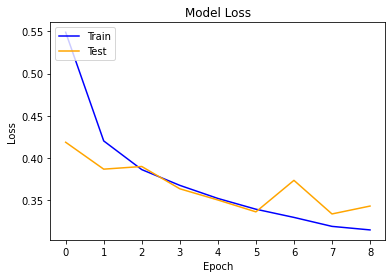

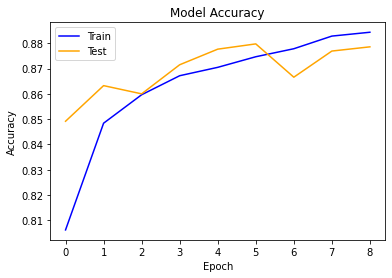

Average validation accuracy: 0.8797500133514404


In [41]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(nontest_images, nontest_labels), (test_images, test_labels) = fashion_mnist.load_data()

def init_model():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # flatten the input
    # leaky relu activation function
    model.add(layers.Dense(128, activation= tf.nn.leaky_relu))
    model.add(layers.Dropout(0.15))  # Adding dropout for regularization
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

from tensorflow.keras.callbacks import EarlyStopping
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',  # Monitor validation accuracy
                               patience=3,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore the weights from the epoch with the best value of the monitored metric

# normalization
nontest_images = nontest_images / 255.0
test_images = test_images / 255.0

# k-fold cross validation
# shuffle data
indices = np.random.permutation(nontest_images.shape[0])
nontest_images = nontest_images[indices]
nontest_labels = nontest_labels[indices]

# use sklearn to do 5-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# store the accuracies
accuracies = []
histories = []

for train_index, val_index in kf.split(nontest_images):
    model = init_model()
    history = model.fit(nontest_images[train_index], nontest_labels[train_index], epochs=15, validation_data=(nontest_images[val_index], nontest_labels[val_index]), callbacks=[early_stopping])
    val_loss, val_acc = model.evaluate(nontest_images[val_index], nontest_labels[val_index])
    accuracies.append(val_acc)
    histories.append(history)
    break

# plot the training and validation loss
for history in histories:
    plt.plot(history.history['loss'], color = 'blue')
    plt.plot(history.history['val_loss'], color = 'orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the training and validation accuracy
for history in histories:
    plt.plot(history.history['accuracy'], color = 'blue')
    plt.plot(history.history['val_accuracy'], color = 'orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# print the final average validation accuracy
print('Average validation accuracy:', np.mean(accuracies))

I liked the ReLU better. Let's just add epochs.

Epoch 1/20
1500/1500 [==============================] - 14s 8ms/step - loss: 0.5394 - accuracy: 0.8099 - val_loss: 0.4173 - val_accuracy: 0.8522
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3994 - accuracy: 0.8559 - val_loss: 0.3870 - val_accuracy: 0.8587
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3653 - accuracy: 0.8671 - val_loss: 0.3718 - val_accuracy: 0.8642
Epoch 4/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3429 - accuracy: 0.8749 - val_loss: 0.3423 - val_accuracy: 0.8758
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3264 - accuracy: 0.8818 - val_loss: 0.3391 - val_accuracy: 0.8733
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3110 - accuracy: 0.8854 - val_loss: 0.3392 - val_accuracy: 0.8759
Epoch 7/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3017 - accuracy: 0.8886 - val_loss: 0.3304 - val_ac

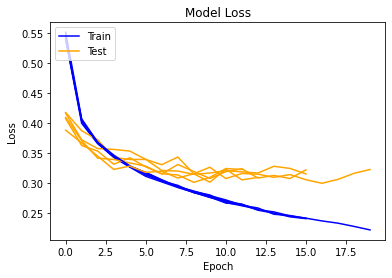

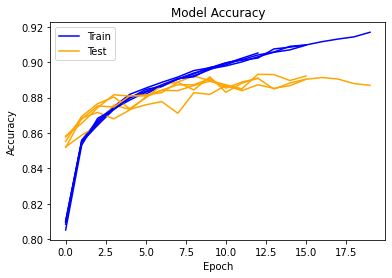

Average validation accuracy: 0.891866660118103


In [44]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(nontest_images, nontest_labels), (test_images, test_labels) = fashion_mnist.load_data()

def init_model():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # flatten the input
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.15))  # Adding dropout for regularization
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

from tensorflow.keras.callbacks import EarlyStopping
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',  # Monitor validation accuracy
                               patience=3,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore the weights from the epoch with the best value of the monitored metric

# normalization
nontest_images = nontest_images / 255.0
test_images = test_images / 255.0

# k-fold cross validation
# shuffle data
indices = np.random.permutation(nontest_images.shape[0])
nontest_images = nontest_images[indices]
nontest_labels = nontest_labels[indices]

# use sklearn to do 5-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# store the accuracies
accuracies = []
histories = []

for train_index, val_index in kf.split(nontest_images):
    model = init_model()
    history = model.fit(nontest_images[train_index], nontest_labels[train_index], epochs=20, validation_data=(nontest_images[val_index], nontest_labels[val_index]),  callbacks=[early_stopping])
    val_loss, val_acc = model.evaluate(nontest_images[val_index], nontest_labels[val_index])
    accuracies.append(val_acc)
    histories.append(history)

# plot the training and validation loss
for history in histories:
    plt.plot(history.history['loss'], color = 'blue')
    plt.plot(history.history['val_loss'], color = 'orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot the training and validation accuracy
for history in histories:
    plt.plot(history.history['accuracy'], color = 'blue')
    plt.plot(history.history['val_accuracy'], color = 'orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# print the final average validation accuracy
print('Average validation accuracy:', np.mean(accuracies))

375/375 [==============================] - 3s 5ms/step


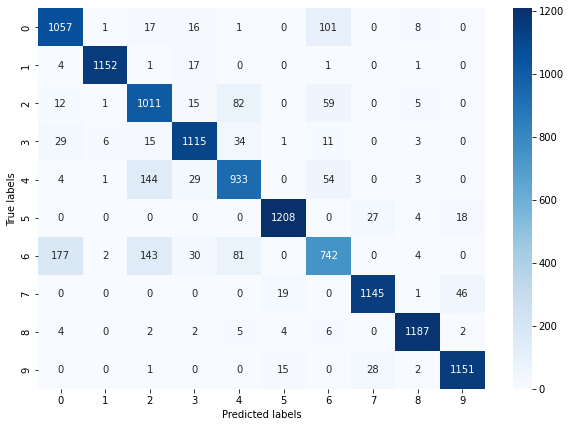

In [45]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

X, y = nontest_images[val_index], nontest_labels[val_index]
predictions = model.predict(X)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


This looks good: beat the baseline by a lot and the epochs usually cutoff. Not overfitting
too much. Let's train on the full dataset with this model.

## Testing

In [46]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(nontest_images, nontest_labels), (test_images, test_labels) = fashion_mnist.load_data()

def init_model():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28))) # flatten the input
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.15))  # Adding dropout for regularization
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# normalization
nontest_images = nontest_images / 255.0
test_images = test_images / 255.0

# k-fold cross validation
# shuffle data
indices = np.random.permutation(nontest_images.shape[0])
nontest_images = nontest_images[indices]
nontest_labels = nontest_labels[indices]

# store the accuracies
accuracies = []
histories = []

model = init_model()
history = model.fit(nontest_images[train_index], nontest_labels[train_index], epochs=14)


Epoch 1/14
1500/1500 [==============================] - 12s 7ms/step - loss: 0.5430 - accuracy: 0.8095
Epoch 2/14
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4057 - accuracy: 0.8528
Epoch 3/14
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3699 - accuracy: 0.8650
Epoch 4/14
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3470 - accuracy: 0.8722
Epoch 5/14
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3289 - accuracy: 0.8780
Epoch 6/14
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3142 - accuracy: 0.8829
Epoch 7/14
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3052 - accuracy: 0.8875
Epoch 8/14
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2951 - accuracy: 0.8898
Epoch 9/14
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2846 - accuracy: 0.8929
Epoch 10/14
1500/1500 [==============================] - 10s 6ms/step - l

313/313 [==============================] - 2s 6ms/step - loss: 0.3363 - accuracy: 0.8800
Final test accuracy: 0.8799999952316284
313/313 [==============================] - 2s 6ms/step


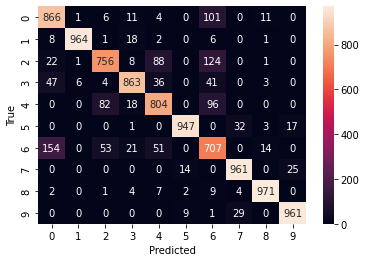

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.84      0.76      0.79      1000
           3       0.91      0.86      0.89      1000
           4       0.81      0.80      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.65      0.71      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [47]:
# test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Final test accuracy:', test_acc)

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the predictions
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)

# get the confusion matrix
cm = confusion_matrix(test_labels, predictions)

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# classification report
from sklearn.metrics import classification_report

# get the classification report
report = classification_report(test_labels, predictions)

# print the classification report
print(report)